## Importando bibliotecas e dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dados = pd.read_csv('mxmh_survey_results.csv')
dados.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## Selecionando colunas

In [3]:
dados.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [4]:
dados_clean = dados[['Age', 'Hours per day', 'Frequency [R&B]', 'Frequency [Metal]', 'Anxiety', 'Music effects' ]].dropna(subset=['Music effects'])
dados_clean

,Age,Hours per day,Frequency [R&B],Frequency [Metal],Anxiety,Music effects
2,18.0,4.0,Never,Sometimes,7.0,No effect
3,61.0,2.5,Sometimes,Never,9.0,Improve
4,18.0,4.0,Very frequently,Never,7.0,Improve
5,18.0,5.0,Very frequently,Rarely,8.0,Improve
6,18.0,3.0,Rarely,Rarely,4.0,Improve
...,...,...,...,...,...,...
731,17.0,2.0,Never,Rarely,7.0,Improve
732,18.0,1.0,Never,Never,3.0,Improve
733,19.0,6.0,Sometimes,Rarely,2.0,Improve
734,19.0,5.0,Never,Never,2.0,Improve


## Observando correlação

In [5]:
dados_clean['Frequency [R&B]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4},inplace = True)
dados_clean['Frequency [Metal]'].replace({'Never':1,'Rarely':2,'Sometimes':3,'Very frequently':4},inplace = True)
dados_clean['Music effects'].replace({'Worsen':1,'No effect':2,'Improve':3},inplace = True)

dados_clean['Frequency [R&B]']= dados_clean['Frequency [R&B]'].astype(int)
dados_clean['Frequency [Metal]'] = dados_clean['Frequency [Metal]'].astype(int)
dados_clean['Music effects'] = dados_clean['Music effects'].astype(int)

In [6]:
dados_clean.describe()

,Age,Hours per day,Frequency [R&B],Frequency [Metal],Anxiety,Music effects
count,727.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,25.143054,3.591415,2.255495,2.226648,5.849588,2.721154
std,11.927993,3.038554,1.061051,1.135644,2.787469,0.498132
min,10.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,18.000000,2.000000,1.000000,1.000000,4.000000,2.000000
50%,21.000000,3.000000,2.000000,2.000000,6.000000,3.000000
75%,28.000000,5.000000,3.000000,3.000000,8.000000,3.000000
max,89.000000,24.000000,4.000000,4.000000,10.000000,3.000000


In [7]:
corr_data = dados_clean.corr()['Anxiety']
corr_data.sort_values()

Age                 -0.179887
Frequency [R&B]      0.027893
Hours per day        0.046757
Frequency [Metal]    0.065099
Music effects        0.090609
Anxiety              1.000000
Name: Anxiety, dtype: float64

<AxesSubplot:>

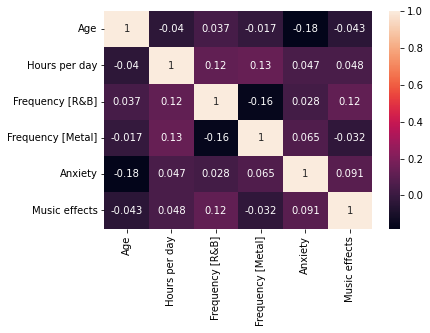

In [8]:
sns.heatmap(dados_clean.corr(), annot= True)

Os indices de ansiedade estão mais correlacionados com o gênero Metal, enquanto R&B possui uma correlação maior com o efeito da música no estado emocional (para pior ou para melhor).

## Visualização gráfica

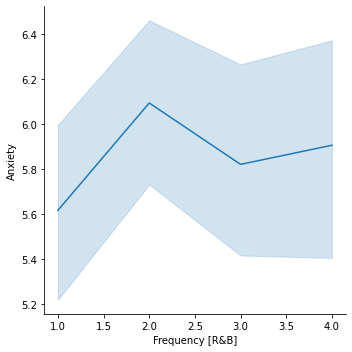

In [9]:
sns.relplot(x='Frequency [R&B]', y='Anxiety', kind='line', data=dados_clean) 

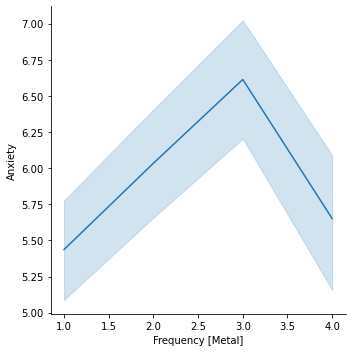

In [10]:
sns.relplot(x='Frequency [Metal]', y='Anxiety', kind='line', data=dados_clean)

Observa-se que ouvintes eventuais de Metal & R&B ('Rarely' = 2 e 'Sometimes' = 3) tem indices de ansiedade parecidos.
Já ouvintes frequentes de Metal apresentam indice menor de ansiedade na comparação com ouvintes frequentes de R&B ('Very fequently' = 4). 